# 安装这个包

打开anaconda prompt或者backend输入：

- `pip install my-covid-report==1.8`
- `pip install plotly`

## 运行下面的代码，报错在群里问

正在读取【横截面】数据......
读取完毕
正在读取【时间序列】数据......
读取完毕
正在获取并处理【上海】数据（数据来自上海卫健委）......
读取完毕
国家：美国
最新更新时间：2022-08-31 04:33:29
----------------------------------------TOTAL-----------------------------------------
截至目前【美国】累计确诊：94379362 | 新增确诊：93831
截至目前【美国】累计死亡：1044727 | 新增死亡：357
截至目前【New York】累计确诊：5984464 | 新增确诊：3749
截至目前【New York】累计死亡：71095 | 新增死亡：44
----------------------------------------DETAIL----------------------------------------
蓝色为确诊数
红色为死亡数
--------------------------------------------------------------------------------------
省级行政区                     新增确诊数↓     新增死亡数      每10万人确诊人数  累计致死率     
California                     23924            24             28061.296         0.856%        
South Carolina                 13261            18             32518.431         1.091%        
Texas                          11261            44             27042.158         1.151%        
Mississippi                    8144             28             30678.874         1.401%        
Tennessee     

国家：中国
最新更新时间：2022-08-31 04:20:57
----------------------------------------TOTAL-----------------------------------------
截至目前【中国】累计确诊：1775821 | 新增确诊：9239
截至目前【中国】累计死亡：14913 | 新增死亡：13
截至目前【Beijing】累计确诊：3979 | 新增确诊：4
截至目前【Beijing】累计死亡：9 | 新增死亡：0
----------------------------------------DETAIL----------------------------------------
蓝色为确诊数
红色为死亡数
--------------------------------------------------------------------------------------
省级行政区                     新增确诊数↓     新增死亡数      每10万人确诊人数  累计致死率     
Hong Kong                      8848             13             20425.643         0.632%        
Sichuan                        166              0              4.262             0.084%        
Tibet                          45               0              20.756            0.0%          
Hainan                         36               0              93.865            0.068%        
Guangdong                      35               0              7.904             0.089%        
Tianjin            

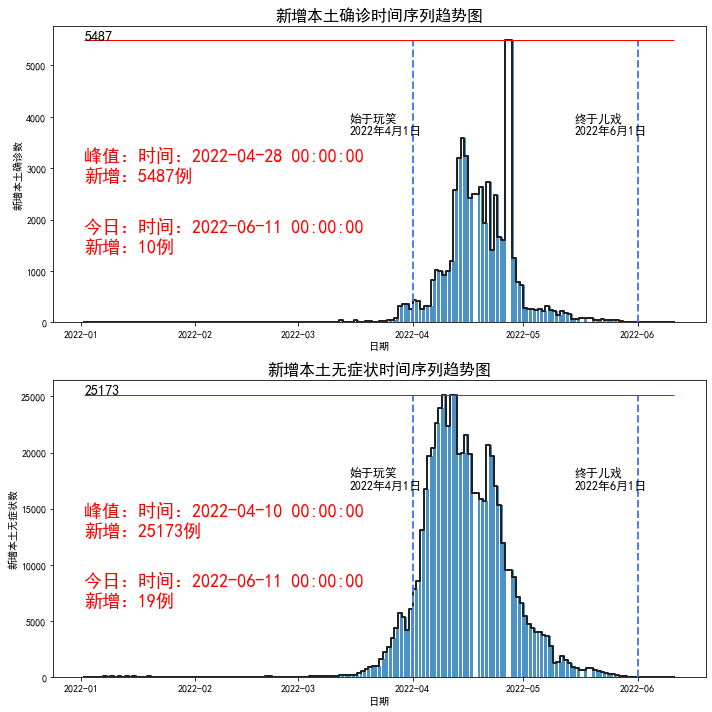

In [2]:
from covid_report import getdata,data_processing,covid_visualization

# get data
latest_data_global,prev_data_global,latest_data_us,prev_data_us = getdata.GET_csse_covid_19_daily_reports()
ts_confirmed_us,ts_confirmed_global,ts_deaths_us,ts_deaths_global,ts_recovered_global = getdata.GET_csse_covid_19_time_series()
shanghai_df = getdata.GET_shanghai_data()


# data processing
ts_confirmed_CHINA_incre, loc_data_CHINA, sorted_provinces = data_processing.ts_process_CHINA(ts_confirmed_global,clip=True)
ts_deaths_CHINA_incre, _, _ = data_processing.ts_process_CHINA(ts_deaths_global,clip=True)
ts_recovered_CHINA_incre, _, _ = data_processing.ts_process_CHINA(ts_recovered_global,clip=True)

ts_confirmed_US_incre,loc_data_us,sorted_state = data_processing.ts_process_US(ts_confirmed_us,clip=True)
ts_deaths_US_incre,_,_,population = data_processing.ts_process_US(ts_deaths_us,death = True,clip=True)

latest_data_CHINA = data_processing.daily_process(latest_data_global, country = 'China')
prev_data_CHINA = data_processing.daily_process(prev_data_global, country = 'China')
latest_data_US = data_processing.daily_process(latest_data_us, country = 'US')
prev_data_US = data_processing.daily_process(prev_data_us, country = 'US')


# visualization
covid_visualization.Decompose_US(
    ts_confirmed_US_incre,
    latest_data_US,
    prev_data_US,
    start='2020-03-01',
    # end='2022-06-01',
    ma = [7,30],
    method = '新增',             # method = '累计'
    specify = 'New York',        # specify = 'Shanghai' specify = 'All' specify = None
    verbose = 1,
    kind = '确诊'
)

covid_visualization.Decompose_CHINA(
    ts_confirmed_CHINA_incre,
    latest_data_CHINA,
    prev_data_CHINA,
    start='2020-03-01',
    # end='2022-06-01',
    ma = [7,30],
    method = '新增',              # method = '累计'
    specify = 'Beijing',         # specify = 'Shanghai' specify = 'All' specify = None
    verbose = 1,
    kind = '确诊'
)